In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm
tqdm.pandas()
pd.set_option('display.max_columns', 500)

sns.set_theme()

C:\Users\Patrick\house\house-venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
pdf = pd.read_csv("./pp-complete.csv", header=None, names=[
    "uuid",
    "price",
    "date",
    "postal_code",
    "property_type",
    "new_build",
    "estate_type",
    "name_or_number",
    "flat_number",
    "street",
    "town_or_city",
    "district",
    "county",
    "locality",
    "unknown_0",
    "unknown_1"
], index_col=None)

In [22]:
pdf.to_feather("pdf.feather")

# pre-processing pdf

In [26]:
pdf.date = pdf.date.progress_apply(pd.Timestamp)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28919900/28919900 [01:23<00:00, 347145.37it/s]


In [30]:
pdf.property_type = pdf.property_type.astype("category")

In [31]:
pdf.new_build = pdf.new_build.astype("category")

In [35]:
pdf.estate_type = pdf.estate_type.astype("category")

In [36]:
pdf.dtypes

uuid                      object
price                      int64
date              datetime64[ns]
postal_code               object
property_type           category
new_build               category
estate_type             category
name_or_number            object
flat_number               object
street                    object
town_or_city              object
district                  object
county                    object
locality                  object
unknown_0                 object
unknown_1                 object
dtype: object

In [39]:
pdf.to_feather("pdf-processed.feather")

In [2]:
pdf = pd.read_feather("pdf-processed.feather")

# DEPRECATED for better dataset: attempt to combine ukpc

In [40]:
ukpc = pd.read_feather("ukpc.feather")

In [43]:
pdf.head()

,uuid,price,date,postal_code,property_type,new_build,estate_type,name_or_number,flat_number,street,town_or_city,district,county,locality,unknown_0,unknown_1
0,{5BBE9CB3-6332-4EB0-9CD3-8737CEA4A65A},42000,1995-12-21,NE4 9DN,S,N,F,8,NaN,MATFEN PLACE,FENHAM,NEWCASTLE UPON TYNE,NEWCASTLE UPON TYNE,TYNE AND WEAR,A,A
1,{20E2441A-0F16-49AB-97D4-8737E62A5D93},95000,1995-03-03,RM16 4UR,S,N,F,30,NaN,HEATH ROAD,GRAYS,GRAYS,THURROCK,THURROCK,A,A
2,{D893EE64-4464-44B5-B01B-8E62403ED83C},74950,1995-10-03,CW10 9ES,D,Y,F,15,NaN,SHROPSHIRE CLOSE,MIDDLEWICH,MIDDLEWICH,CONGLETON,CHESHIRE,A,A
3,{F9F753A8-E56A-4ECC-9927-8E626A471A92},43500,1995-11-14,TS23 3LA,S,N,F,19,NaN,SLEDMERE CLOSE,BILLINGHAM,BILLINGHAM,STOCKTON-ON-TEES,STOCKTON-ON-TEES,A,A
4,{E166398A-A19E-470E-BB5A-83B4C254CF6D},63000,1995-09-08,CA25 5QH,S,N,F,8,NaN,CROSSINGS CLOSE,CLEATOR MOOR,CLEATOR MOOR,COPELAND,CUMBRIA,A,A


In [42]:
ukpc

,postcode,latitude,longitude
id,,,
1,AB10 1XG,57.144156,-2.114864
2,AB10 6RN,57.137871,-2.121487
3,AB10 7JB,57.124274,-2.127206
4,AB11 5QN,57.142701,-2.093295
5,AB11 6UL,57.137468,-2.112455
...,...,...,...
2711464,YO7 4FB,54.243953,-1.472731
2711465,YO7 9DN,54.232597,-1.328747
2711466,YO8 4FS,53.779924,-1.069318


In [48]:
df = pd.merge(pdf, ukpc[['postcode', 'latitude', 'longitude']], left_on="postal_code", right_on="postcode", how="left")

In [49]:
df.shape

(28919900, 19)

In [50]:
pdf.shape

(28919900, 16)

In [51]:
df.to_feather("pdf-w-longlat.feather")

In [66]:
df.locality.unique()

array(['TYNE AND WEAR', 'THURROCK', 'CHESHIRE', 'STOCKTON-ON-TEES',
       'CUMBRIA', 'NORFOLK', 'SOUTH YORKSHIRE', 'GREATER LONDON',
       'NORTH YORKSHIRE', 'WEST MIDLANDS', 'SOMERSET', 'SLOUGH',
       'BRACKNELL FOREST', 'LANCASHIRE', 'WEST YORKSHIRE', 'SUFFOLK',
       'SOUTH GLAMORGAN', 'HAMPSHIRE', 'AVON', 'STAFFORDSHIRE',
       'MERSEYSIDE', 'CORNWALL', 'CLWYD', 'SOUTHEND-ON-SEA', 'HUMBERSIDE',
       'WEST SUSSEX', 'WARWICKSHIRE', 'NORTHAMPTONSHIRE', 'WARRINGTON',
       'SHROPSHIRE', 'HERTFORDSHIRE', 'BEDFORDSHIRE', 'BERKSHIRE',
       'OXFORDSHIRE', 'LINCOLNSHIRE', 'KENT', 'LEICESTERSHIRE', 'SURREY',
       'MID GLAMORGAN', 'HEREFORD AND WORCESTER', 'ESSEX',
       'GREATER MANCHESTER', 'BUCKINGHAMSHIRE', 'CONWY', 'NEWPORT',
       'MILTON KEYNES', 'CAMBRIDGESHIRE', 'SWANSEA', 'GLOUCESTERSHIRE',
       'BLACKPOOL', 'NORTHUMBERLAND', 'WORCESTERSHIRE', 'LUTON',
       'EAST SUSSEX', 'DERBYSHIRE', 'NOTTINGHAMSHIRE', 'BOURNEMOUTH',
       'GWENT', 'WOKINGHAM', 'STOKE-ON-TRENT'

# better location dataset

In [5]:
odf = pd.read_feather("./open_pc_geo.feather")

In [6]:
pdf.head()

,uuid,price,date,postal_code,property_type,new_build,estate_type,name_or_number,flat_number,street,town_or_city,district,county,locality,unknown_0,unknown_1
0,{5BBE9CB3-6332-4EB0-9CD3-8737CEA4A65A},42000,1995-12-21,NE4 9DN,S,N,F,8,None,MATFEN PLACE,FENHAM,NEWCASTLE UPON TYNE,NEWCASTLE UPON TYNE,TYNE AND WEAR,A,A
1,{20E2441A-0F16-49AB-97D4-8737E62A5D93},95000,1995-03-03,RM16 4UR,S,N,F,30,None,HEATH ROAD,GRAYS,GRAYS,THURROCK,THURROCK,A,A
2,{D893EE64-4464-44B5-B01B-8E62403ED83C},74950,1995-10-03,CW10 9ES,D,Y,F,15,None,SHROPSHIRE CLOSE,MIDDLEWICH,MIDDLEWICH,CONGLETON,CHESHIRE,A,A
3,{F9F753A8-E56A-4ECC-9927-8E626A471A92},43500,1995-11-14,TS23 3LA,S,N,F,19,None,SLEDMERE CLOSE,BILLINGHAM,BILLINGHAM,STOCKTON-ON-TEES,STOCKTON-ON-TEES,A,A
4,{E166398A-A19E-470E-BB5A-83B4C254CF6D},63000,1995-09-08,CA25 5QH,S,N,F,8,None,CROSSINGS CLOSE,CLEATOR MOOR,CLEATOR MOOR,COPELAND,CUMBRIA,A,A


In [7]:
odf.head()

,postcode,status,usertype,easting,northing,pos_qual,country,latitude,longitude,nsp,fxw7,fxw8,area,district,sector,inc,outc
0,AB1 0AA,terminated,small,385386,801193,1,Scotland,57.101474,-2.242851,AB10AA,AB1 0AA,AB1 0AA,AB,AB1,AB1 0,AB1,0AA
1,AB1 0AB,terminated,small,385177,801314,1,Scotland,57.102554,-2.246308,AB10AB,AB1 0AB,AB1 0AB,AB,AB1,AB1 0,AB1,0AB
2,AB1 0AD,terminated,small,385053,801092,1,Scotland,57.100556,-2.248342,AB10AD,AB1 0AD,AB1 0AD,AB,AB1,AB1 0,AB1,0AD
3,AB1 0AE,terminated,small,384600,799300,8,Scotland,57.084444,-2.255708,AB10AE,AB1 0AE,AB1 0AE,AB,AB1,AB1 0,AB1,0AE
4,AB1 0AF,terminated,large,384460,800660,8,Scotland,57.096656,-2.258102,AB10AF,AB1 0AF,AB1 0AF,AB,AB1,AB1 0,AB1,0AF


In [15]:
df = pd.merge(pdf, odf, left_on="postal_code", right_on="postcode", how="left")[[
       'price', 'date', 'postal_code', 'property_type', 'new_build',
       'estate_type', 'name_or_number', 'flat_number', 'street',
       'town_or_city', 'district_x', 'county', 'locality', 'status', 'usertype',
       'pos_qual', 'country', 'latitude', 'longitude'
]]

In [20]:
df = df.rename(columns={"district_x" : "district"})

In [21]:
df.to_feather("./pdf-w-longlat.feather")

# figure out ymd

In [22]:
df['year'] = pd.DatetimeIndex(df.date).year
df['month'] = pd.DatetimeIndex(df.date).month
df['day'] = pd.DatetimeIndex(df.date).day

In [24]:
df.to_feather("./pdf-w-longlat-w-ymd.feather")

In [54]:
df.country.drop_duplicates(keep="first").dropna().unique()

array(['England', 'Wales', 'Scotland'], dtype=object)

# incorporate inflation data

In [27]:
idf = pd.read_csv("./UK-HPI-full-file-2023-09.csv")

In [29]:
idf = idf[['Date', 'RegionName'] + idf.columns[idf.columns.str.endswith("Index")][0:5].tolist()].sort_values(by=["Date", "RegionName"]).dropna()

In [32]:
idf['Date'] = idf.Date.progress_apply(lambda x: pd.to_datetime(x, format="%d/%m/%Y"))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 131673/131673 [00:08<00:00, 15454.11it/s]


In [34]:
idf.Date.max()

Timestamp('2023-09-01 00:00:00')

In [37]:
idf['year'] = pd.DatetimeIndex(idf.Date).year
idf['month'] = pd.DatetimeIndex(idf.Date).month
idf['day'] = pd.DatetimeIndex(idf.Date).day

In [57]:
imdf = idf[idf.RegionName.isin(df.country.drop_duplicates(keep="first").dropna().unique())].sort_values(by="Date")

In [58]:
imdf.head()

,Date,RegionName,Index,DetachedIndex,SemiDetachedIndex,TerracedIndex,FlatIndex,year,month,day
41331,1995-01-01,England,26.226925,28.257874,27.436474,25.279664,23.762969,1995,1,1
123234,1995-01-01,Wales,31.704043,32.491063,31.399881,30.777231,34.448112,1995,1,1
41332,1995-02-01,England,26.174367,27.787429,27.699083,25.392122,23.276083,1995,2,1
123235,1995-02-01,Wales,31.158984,31.710198,31.382101,29.896958,34.392644,1995,2,1
41333,1995-03-01,England,26.226192,27.694587,27.602783,25.533494,23.687213,1995,3,1


In [ ]:
imdf.tail()

In [67]:
df = pd.merge(df, imdf, left_on=["country", "year", "month"], right_on=["RegionName", "year", "month"], how="left")[
      ['price', 'date', 'postal_code', 'property_type', 'new_build',
       'estate_type', 'name_or_number', 'flat_number', 'street',
       'town_or_city', 'district', 'county', 'locality', 'status', 'usertype',
       'pos_qual', 'country', 'latitude', 'longitude', 'year', 'month',
       'day_x', 'Index', 'DetachedIndex',
       'SemiDetachedIndex', 'TerracedIndex', 'FlatIndex']
].rename(columns={"day_x": "day", "Index": "HIndex"})

In [85]:
df.longitude = df.longitude.astype(np.float64)
df.latitude = df.latitude.astype(np.float64)

In [87]:
df.tail()

,price,date,postal_code,property_type,new_build,estate_type,name_or_number,flat_number,street,town_or_city,district,county,locality,status,usertype,pos_qual,country,latitude,longitude,year,month,day,HIndex,DetachedIndex,SemiDetachedIndex,TerracedIndex,FlatIndex
28919895,200000,2024-01-10,BH4 8DN,F,N,L,"THE CHINES, 43",FLAT 50,ALUM CHINE ROAD,None,BOURNEMOUTH,"BOURNEMOUTH, CHRISTCHURCH AND POOLE","BOURNEMOUTH, CHRISTCHURCH AND POOLE",live,small,1.0,England,50.719531,-1.902163,2024,1,10,NaN,NaN,NaN,NaN,NaN
28919896,110000,2024-01-29,DT11 7DU,F,N,L,CHESTNUT HOUSE,FLAT 8,EAST STREET,None,BLANDFORD FORUM,DORSET,DORSET,live,small,1.0,England,50.856678,-2.160971,2024,1,29,NaN,NaN,NaN,NaN,NaN
28919897,400000,2024-01-26,SP8 5LG,D,N,F,10,None,SANDILANDS CLOSE,EAST STOUR,GILLINGHAM,DORSET,DORSET,live,small,1.0,England,51.008975,-2.282411,2024,1,26,NaN,NaN,NaN,NaN,NaN
28919898,485000,2024-01-26,BH21 2JH,D,N,F,12,None,CEDAR DRIVE,None,WIMBORNE,DORSET,DORSET,live,small,1.0,England,50.800837,-1.951347,2024,1,26,NaN,NaN,NaN,NaN,NaN
28919899,950000,2024-01-12,DT10 2AA,D,N,F,THE HOMESTEAD,None,HOLE HOUSE LANE,GLUE HILL,STURMINSTER NEWTON,DORSET,DORSET,live,small,1.0,England,50.915561,-2.311547,2024,1,12,NaN,NaN,NaN,NaN,NaN


In [88]:
df.to_feather("./pdf-infla.feather")

## adjust by inflation

In [99]:
df.head()

,price,date,postal_code,property_type,new_build,estate_type,name_or_number,flat_number,street,town_or_city,district,county,locality,status,usertype,pos_qual,country,latitude,longitude,year,month,day,HIndex,DetachedIndex,SemiDetachedIndex,TerracedIndex,FlatIndex
0,42000,1995-12-21,NE4 9DN,S,N,F,8,None,MATFEN PLACE,FENHAM,NEWCASTLE UPON TYNE,NEWCASTLE UPON TYNE,TYNE AND WEAR,live,small,1.0,England,54.982775,-1.648988,1995,12,21,26.088326,27.691025,27.546210,25.158761,23.735655
1,95000,1995-03-03,RM16 4UR,S,N,F,30,None,HEATH ROAD,GRAYS,GRAYS,THURROCK,THURROCK,live,small,1.0,England,51.487512,0.365619,1995,3,3,26.226192,27.694587,27.602783,25.533494,23.687213
2,74950,1995-10-03,CW10 9ES,D,Y,F,15,None,SHROPSHIRE CLOSE,MIDDLEWICH,MIDDLEWICH,CONGLETON,CHESHIRE,live,small,1.0,England,53.188471,-2.451145,1995,10,3,26.050371,28.078857,27.485066,24.889072,23.622318
3,43500,1995-11-14,TS23 3LA,S,N,F,19,None,SLEDMERE CLOSE,BILLINGHAM,BILLINGHAM,STOCKTON-ON-TEES,STOCKTON-ON-TEES,live,small,1.0,England,54.626690,-1.277039,1995,11,14,26.022302,27.942542,27.417615,24.907271,23.747798
4,63000,1995-09-08,CA25 5QH,S,N,F,8,None,CROSSINGS CLOSE,CLEATOR MOOR,CLEATOR MOOR,COPELAND,CUMBRIA,live,small,1.0,England,54.524751,-3.529235,1995,9,8,26.279407,28.011726,27.623768,25.460386,23.686439


In [108]:
df = df.sort_values(by="date", ascending=True)

In [112]:
df.columns[df.columns.str.endswith("Index")]

Index(['HIndex', 'DetachedIndex', 'SemiDetachedIndex', 'TerracedIndex',
       'FlatIndex'],
      dtype='object')

In [113]:
df[df.columns[df.columns.str.endswith("Index")]] = df[df.columns[df.columns.str.endswith("Index")]].fillna(method="ffill")

C:\Users\Patrick\AppData\Local\Temp\ipykernel_1736\4114427494.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[df.columns[df.columns.str.endswith("Index")]] = df[df.columns[df.columns.str.endswith("Index")]].fillna(method="ffill")


In [116]:
df.head(100000).property_type.unique()

['T', 'D', 'F', 'S', 'O']
Categories (5, object): ['D', 'F', 'O', 'S', 'T']

In [119]:
def _w(r):
    if r.property_type == "T":
        return r.price / r.TerracedIndex
    elif r.property_type == "S":
        return r.price / r.SemiDetachedIndex
    elif r.property_type == "D":
        return r.price / r.DetachedIndex
    elif r.property_type == "F":
        return r.price / r.FlatIndex
    else:
        return r.price / r.HIndex

In [120]:
adj_px = df.progress_apply(_w, axis=1)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 28919900/28919900 [07:56<00:00, 60740.33it/s]


In [123]:
df['adj_price'] = adj_px

In [124]:
df['adj_price']

299902      1527.102963
377631      4423.545772
81878       1700.971999
19489       2104.114138
112649      2482.854683
               ...     
28915902    1494.339623
28918523    5208.333333
28918725     975.292588
28917192    1310.615990
28917693    2210.663199
Name: adj_price, Length: 28919900, dtype: float64

In [129]:
df.to_feather("./pdf-adj-px.feather")

# clean data and observe

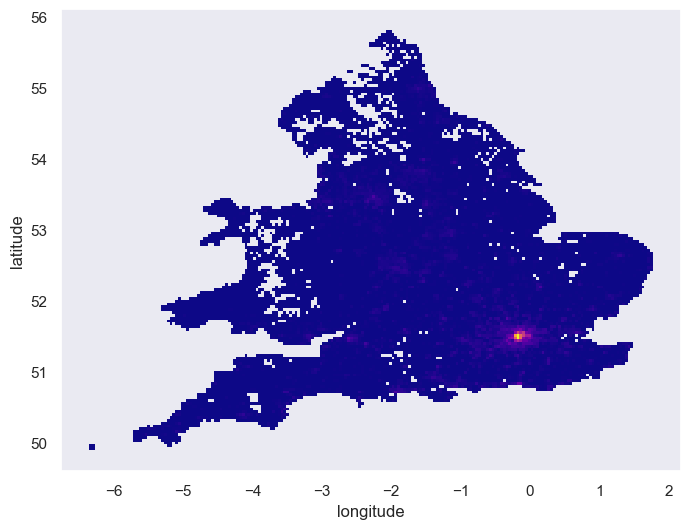

In [149]:
fig, ax = plt.subplots(figsize=(8, 6))
ax=sns.histplot(df[(df.property_type != 'O') & (df.year >= 2010)], x="longitude", y="latitude", weights="adj_price", binwidth=0.0025 * 16, cmap="plasma")
ax.grid()

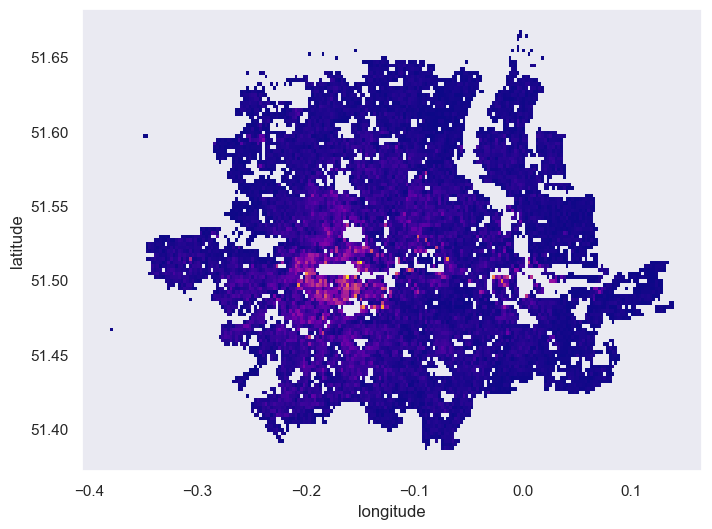

In [150]:
fig, ax = plt.subplots(figsize=(8, 6))
ax=sns.histplot(df[(df.year >= 2010) & (df.district == "LONDON") & (df.property_type != 'O')],
                x="longitude", y="latitude", weights="adj_price", binwidth=0.0025, cmap="plasma")
ax.grid()          

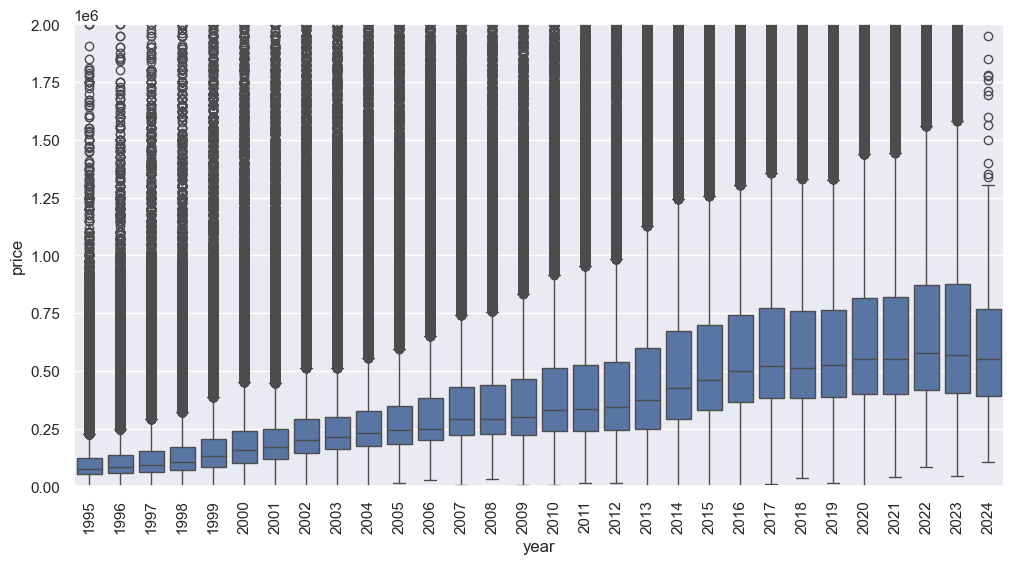

In [163]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.boxplot(df[(df.property_type != 'O') & (df.district == "LONDON")], x="year", y="price")
ax.set_ylim(0, 2e6)
plt.xticks(rotation=90)
plt.show()

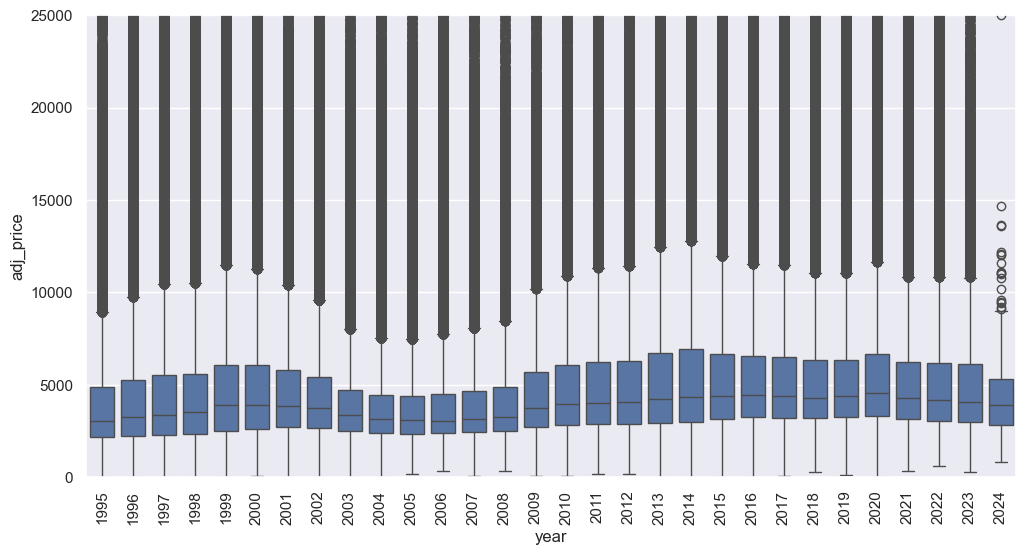

In [164]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.boxplot(df[(df.property_type != 'O') & (df.district == "LONDON")], x="year", y="adj_price")
ax.set_ylim(0, 2.5e4)
plt.xticks(rotation=90)
plt.show()

In [166]:
df[(df.postal_code == "EC1V 7JP") & (df.flat_number == "FLAT 7")]

,price,date,postal_code,property_type,new_build,estate_type,name_or_number,flat_number,street,town_or_city,district,county,locality,status,usertype,pos_qual,country,latitude,longitude,year,month,day,HIndex,DetachedIndex,SemiDetachedIndex,TerracedIndex,FlatIndex,adj_price
17418081,295000,2011-08-17,EC1V 7JP,F,N,L,351,FLAT 7,GOSWELL ROAD,None,LONDON,ISLINGTON,GREATER LONDON,live,small,1.0,England,51.53161,-0.105609,2011,8,17,87.419341,89.860543,89.14941,87.663528,81.768709,3607.737016
28671297,420000,2023-10-20,EC1V 7JP,F,N,L,351,FLAT 7,GOSWELL ROAD,None,LONDON,ISLINGTON,GREATER LONDON,live,small,1.0,England,51.53161,-0.105609,2023,10,20,152.600000,160.300000,158.40000,153.800000,132.500000,3169.811321


In [169]:
df[(df.postal_code == "W11 1UE") & (df.flat_number == "2")]

,price,date,postal_code,property_type,new_build,estate_type,name_or_number,flat_number,street,town_or_city,district,county,locality,status,usertype,pos_qual,country,latitude,longitude,year,month,day,HIndex,DetachedIndex,SemiDetachedIndex,TerracedIndex,FlatIndex,adj_price
5515467,179000,2000-04-28,W11 1UE,F,N,L,CERVANTES COURT,2,RUSTON MEWS,None,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,live,small,1.0,England,51.516335,-0.212928,2000,4,28,39.257127,42.224167,39.822072,37.015641,39.571048,4523.509216
22029712,560000,2016-04-22,W11 1UE,F,N,L,CERVANTES COURT,2,RUSTON MEWS,None,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,live,small,1.0,England,51.516335,-0.212928,2016,4,22,110.316661,109.383131,110.365257,110.839724,110.580582,5064.180242
27238307,525000,2021-06-30,W11 1UE,F,N,L,CERVANTES COURT,2,RUSTON MEWS,None,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,live,small,1.0,England,51.516335,-0.212928,2021,6,30,140.125345,142.762180,143.192607,143.689310,127.115890,4130.089480


In [181]:
df[(df.postal_code == "W11 1UE")]

,price,date,postal_code,property_type,new_build,estate_type,name_or_number,flat_number,street,town_or_city,district,county,locality,status,usertype,pos_qual,country,latitude,longitude,year,month,day,HIndex,DetachedIndex,SemiDetachedIndex,TerracedIndex,FlatIndex,adj_price
438958,95000,1995-04-15,W11 1UE,F,N,L,CERVANTES COURT,6,RUSTON MEWS,LONDON,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,live,small,1.0,England,51.516335,-0.212928,1995,4,15,26.418235,28.057896,27.723964,25.603107,24.072160,3946.467668
672500,62000,1995-04-28,W11 1UE,F,N,L,CERVANTES COURT,4,RUSTON MEWS,LONDON,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,live,small,1.0,England,51.516335,-0.212928,1995,4,28,26.418235,28.057896,27.723964,25.603107,24.072160,2575.589426
340424,142000,1995-11-30,W11 1UE,F,N,L,CERVANTES COURT,7,RUSTON MEWS,LONDON,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,live,small,1.0,England,51.516335,-0.212928,1995,11,30,26.022302,27.942542,27.417615,24.907271,23.747798,5979.501813
5515467,179000,2000-04-28,W11 1UE,F,N,L,CERVANTES COURT,2,RUSTON MEWS,None,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,live,small,1.0,England,51.516335,-0.212928,2000,4,28,39.257127,42.224167,39.822072,37.015641,39.571048,4523.509216
8357692,250000,2002-11-29,W11 1UE,F,N,L,CERVANTES COURT,3,RUSTON MEWS,LONDON,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,live,small,1.0,England,51.516335,-0.212928,2002,11,29,58.511039,63.588768,59.202404,54.210835,60.424346,4137.405171
10979636,277500,2004-03-03,W11 1UE,F,N,L,CERVANTES COURT,6,RUSTON MEWS,LONDON,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,live,small,1.0,England,51.516335,-0.212928,2004,3,3,70.281814,73.680253,72.086447,67.255180,69.618721,3985.996815
10825762,345000,2004-03-05,W11 1UE,F,N,L,CERVANTES COURT,7,RUSTON MEWS,LONDON,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,live,small,1.0,England,51.516335,-0.212928,2004,3,5,70.281814,73.680253,72.086447,67.255180,69.618721,4955.563608
11805585,465000,2005-06-30,W11 1UE,F,N,L,CERVANTES COURT,7,RUSTON MEWS,LONDON,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,live,small,1.0,England,51.516335,-0.212928,2005,6,30,80.879702,81.286351,83.480395,80.438604,77.527359,5997.882658
22029712,560000,2016-04-22,W11 1UE,F,N,L,CERVANTES COURT,2,RUSTON MEWS,None,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,live,small,1.0,England,51.516335,-0.212928,2016,4,22,110.316661,109.383131,110.365257,110.839724,110.580582,5064.180242
27238307,525000,2021-06-30,W11 1UE,F,N,L,CERVANTES COURT,2,RUSTON MEWS,None,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,live,small,1.0,England,51.516335,-0.212928,2021,6,30,140.125345,142.762180,143.192607,143.689310,127.115890,4130.089480


In [176]:
df[(df.postal_code == "N4 2WL") & (df.flat_number == "FLAT 28")]

,price,date,postal_code,property_type,new_build,estate_type,name_or_number,flat_number,street,town_or_city,district,county,locality,status,usertype,pos_qual,country,latitude,longitude,year,month,day,HIndex,DetachedIndex,SemiDetachedIndex,TerracedIndex,FlatIndex,adj_price
25383656,529200,2020-11-26,N4 2WL,F,Y,L,HARTINGTONS COURT,FLAT 28,COSTER AVENUE,None,LONDON,HACKNEY,GREATER LONDON,live,small,1.0,England,51.570007,-0.09315,2020,11,26,129.357526,131.296273,131.75837,130.964456,121.175597,4367.215943


In [189]:
df[(df.postal_code == "W10 5UJ") & (df.name_or_number == "53")]

,price,date,postal_code,property_type,new_build,estate_type,name_or_number,flat_number,street,town_or_city,district,county,locality,status,usertype,pos_qual,country,latitude,longitude,year,month,day,HIndex,DetachedIndex,SemiDetachedIndex,TerracedIndex,FlatIndex,adj_price
465701,305000,1995-09-28,W10 5UJ,S,N,F,53,None,OXFORD GARDENS,LONDON,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,live,small,1.0,England,51.518419,-0.212183,1995,9,28,26.279407,28.011726,27.623768,25.460386,23.686439,11041.216294
6747193,610000,2001-01-19,W10 5UJ,S,N,F,53,None,OXFORD GARDENS,LONDON,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,live,small,1.0,England,51.518419,-0.212183,2001,1,19,41.594481,45.415923,42.164236,38.697097,42.185294,14467.237030
12319825,865000,2005-01-24,W10 5UJ,S,N,F,53,None,OXFORD GARDENS,LONDON,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,live,small,1.0,England,51.518419,-0.212183,2005,1,24,78.169726,80.561305,80.491068,76.528396,75.355825,10746.534000
18943792,1875000,2013-09-12,W10 5UJ,S,N,F,53,None,OXFORD GARDENS,None,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,live,small,1.0,England,51.518419,-0.212183,2013,9,12,91.731100,92.986041,92.205325,92.374094,88.683163,20335.051089
23472789,1875000,2018-08-28,W10 5UJ,S,N,F,53,None,OXFORD GARDENS,None,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,live,small,1.0,England,51.518419,-0.212183,2018,8,28,122.560030,123.279762,123.513395,122.754698,120.203586,15180.539706


In [190]:
1.6e6 / 123.5

12955.465587044535

In [174]:
568000 / 123.500000

4599.19028340081

In [173]:
idf[idf.RegionName == "London"].sort_values(by="Date")

,Date,RegionName,Index,DetachedIndex,SemiDetachedIndex,TerracedIndex,FlatIndex,year,month,day
67437,1995-01-01,London,18.477406,21.715622,20.321394,18.023197,17.858341,1995,1,1
67438,1995-02-01,London,18.065880,21.177623,20.360966,18.035563,16.681052,1995,2,1
67439,1995-03-01,London,18.343629,20.994749,20.127136,17.990246,17.738684,1995,3,1
67440,1995-04-01,London,18.482254,21.108043,20.172004,18.092595,17.991058,1995,4,1
67441,1995-05-01,London,18.724713,21.356377,20.497095,18.355148,18.162092,1995,5,1
...,...,...,...,...,...,...,...,...,...,...
67777,2023-05-01,London,129.600000,140.100000,141.700000,138.600000,121.100000,2023,5,1
67778,2023-06-01,London,130.200000,143.700000,143.600000,140.300000,120.500000,2023,6,1
67779,2023-07-01,London,132.300000,147.400000,147.500000,143.700000,121.300000,2023,7,1
67780,2023-08-01,London,133.800000,149.000000,148.400000,144.600000,123.300000,2023,8,1


In [121]:
df['year'] = pd.DatetimeIndex(df.date).year
df['month'] = pd.DatetimeIndex(df.date).month
df['day'] = pd.DatetimeIndex(df.date).day

In [123]:
df.to_feather("pdf-w-longlat-w-ymd.feather")

In [131]:
df.property_type.unique()          

['S', 'D', 'F', 'T', 'O']
Categories (5, object): ['D', 'F', 'O', 'S', 'T']

<Axes: xlabel='year', ylabel='price'>

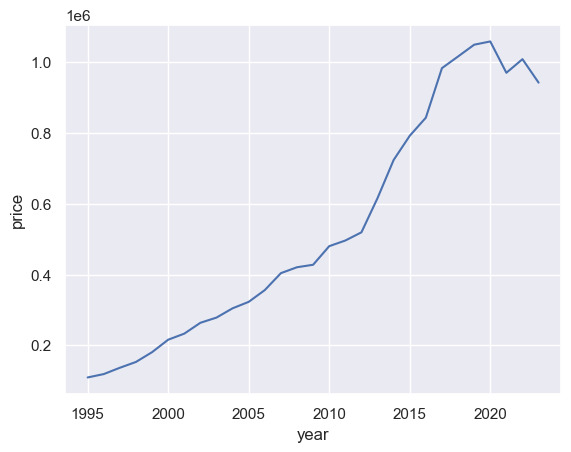

In [129]:
sns.lineplot(df[(df.district == "LONDON") & (df.year < 2024)].groupby("year").price.mean())


C:\Users\Patrick\AppData\Local\Temp\ipykernel_3884\3619409225.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = sns.lineplot(df[(df.district == "LONDON") & (df.year < 2024)].groupby(["year", "property_type"]).price.mean().reset_index(), x="year", y="price", hue="property_type")


(0.0, 3000000.0)

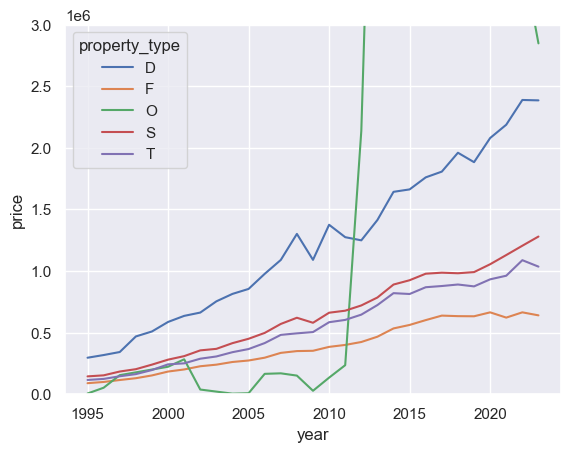

In [135]:
ax = sns.lineplot(df[(df.district == "LONDON") & (df.year < 2024)].groupby(["year", "property_type"]).price.mean().reset_index(), x="year", y="price", hue="property_type")
ax.set_ylim(0, 3e6)

C:\Users\Patrick\AppData\Local\Temp\ipykernel_3884\592731297.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  _l = _df.groupby(["year", "property_type"]).price.mean() /  _df.groupby(["year", "property_type"]).price.mean().loc[y]


Text(0, 0.5, 'px ratio a/ 2000')

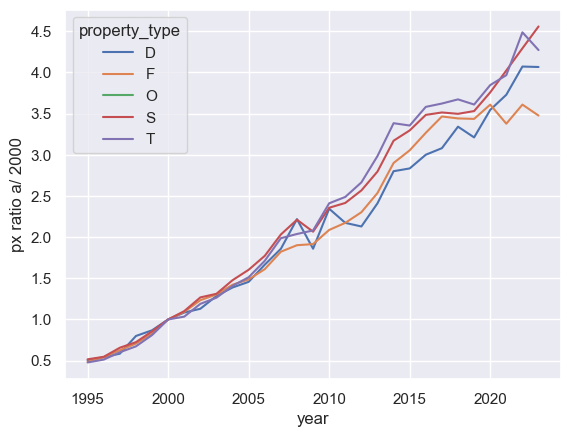

In [155]:
y = 2000
_df = (df[(df.district == "LONDON") & (df.year < 2024) & (df.property_type != 'O')])
_l = _df.groupby(["year", "property_type"]).price.mean() /  _df.groupby(["year", "property_type"]).price.mean().loc[y]
ax = sns.lineplot(_l.reset_index(), x="year", y="price", hue="property_type")
ax.set_ylabel(f"px ratio a/ {y}")
#ax.set_ylim(0, 10)


# build model dataset

In [ ]:
# adjust price by hpi / inflation manually
# select few categorical and generate one-hot based on statistical significance
# run clustering on lat long data and build that into categorical data
# use temporal split to factor in temporal aspect?

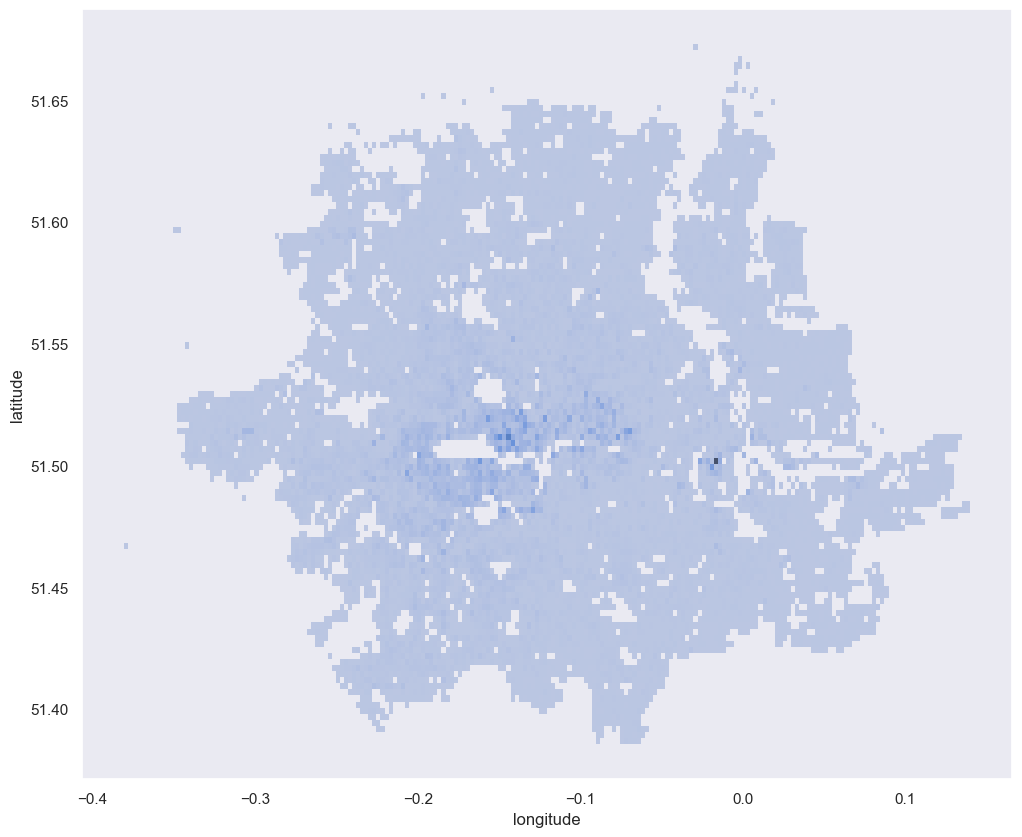